# Deep Learning Fundamentals: Assignment 1

By Jack Hetherington

Due: 11:59pm, 27/09/2024

In [44]:
#import relevant packages
import pandas as pd
import numpy as np

from sklearn.datasets import load_svmlight_file
import requests
from io import BytesIO

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV


## Step 1: Load and inspect data

In [45]:
##Read in pre-processed dataset from website

#Fetch information from the url as a stream in memory
response = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale")
data = BytesIO(response.content)

#Read in data from LIBSVM format and convert to dense format 
X_sparse, y = load_svmlight_file(data)
X = X_sparse.toarray()

#Combine label and features into a dataframe
df = pd.DataFrame(X)
df['Outcome'] = y
new_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
               'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Rename the columns in the DataFrame
df.columns = new_columns
print(df.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.294118  0.487437       0.180328      -0.292929 -1.000000  0.001490   
1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000 -0.207153   
2    -0.058824  0.839196       0.049180      -1.000000 -1.000000 -0.305514   
3    -0.882353 -0.105528       0.081967      -0.535354 -0.777778 -0.162444   
4    -1.000000  0.376884      -0.344262      -0.292929 -0.602837  0.284650   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -0.531170 -0.033333     -1.0  
1                 -0.766866 -0.666667      1.0  
2                 -0.492741 -0.633333     -1.0  
3                 -0.923997 -1.000000      1.0  
4                  0.887276 -0.600000     -1.0  


In [46]:
##Inspect data
print('shape X', X.shape)
print('shape y', y.shape)
print(df['Outcome'].value_counts())

df.describe()

shape X (768, 8)
shape y (768,)
 1.0    500
-1.0    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-0.547641,0.215020,0.132877,-0.585122,-0.811349,-0.046421,-0.663641,-0.591971,0.302083
std,0.396421,0.321333,0.317308,0.322267,0.272444,0.234997,0.282945,0.392008,0.953903
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858455,-0.900000,-1.000000
50%,-0.647059,0.175879,0.180328,-0.535354,-0.927896,-0.046200,-0.748506,-0.733333,1.000000
75%,-0.294118,0.409547,0.311475,-0.353535,-0.699173,0.090909,-0.531811,-0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


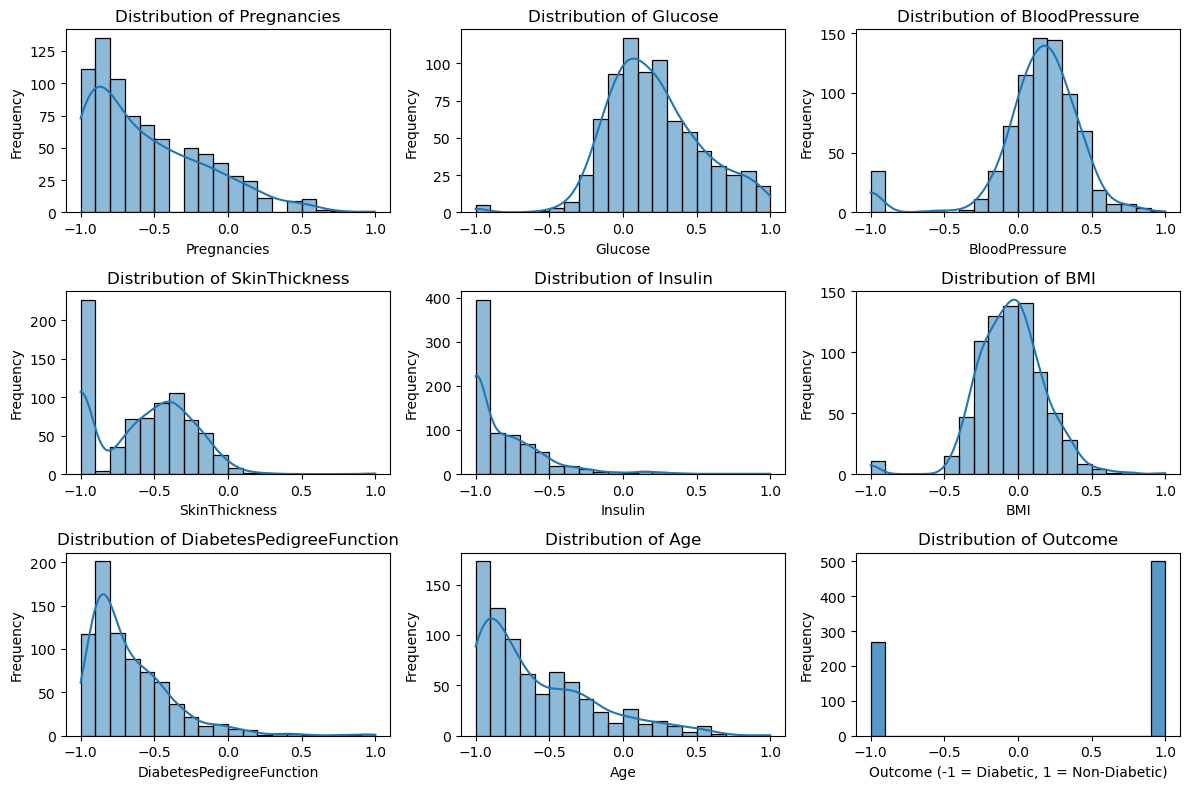

In [47]:
#Plot data

# Loop through each feature and create a distribution plot
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    if column == 'Outcome':
        sns.histplot(df[column], bins=20, kde=False)
        plt.title(f"Distribution of {column}")
        plt.xlabel("Outcome (-1 = Diabetic, 1 = Non-Diabetic)")
    else:
        sns.histplot(df[column], bins=20, kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(f"{column}")
 
    plt.ylabel("Frequency")
    
plt.tight_layout()
plt.show()

## Step 2: Split data and initialise preceptron

In [48]:
#Split data in test and training sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialise the Perceptron model
perceptron = Perceptron(random_state=42)

## Step 3: Train model and test accuracy

In [49]:
#Train the model
perceptron.fit(X_train, y_train)

#Make predictions on the test set
y_pred = perceptron.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

#Output results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.81      0.31      0.45        55
         1.0       0.71      0.96      0.82        99

    accuracy                           0.73       154
   macro avg       0.76      0.63      0.63       154
weighted avg       0.75      0.73      0.69       154



<font color='blue'> The model has very poor accuracy for detecting diabetes (31%). While the overall accuracy is 73%, the model will result in many false negatives. To improve the performance, the class imbalance and hyperparameter tuning will be addressed. 


### Step 4: Address class imbalance 

In [50]:
#Initialise perceptron with class weigthing to balance
perceptron = Perceptron(class_weight='balanced', random_state=42)

#Train the model
perceptron.fit(X_train, y_train)

#Make predictions on the test set
y_pred = perceptron.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

#Output results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.61      0.49      0.55        55
         1.0       0.75      0.83      0.78        99

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



<font color='blue'> Overall, addressing the class imbalance improves the ability to predict diabetes (from 31% to 49%). This is at the expense of correctly identify healthy patients (from 96% to 83%). 

## Step 5: Hyperparameter tuning

In [51]:
perceptron = Perceptron(random_state=42)

#Define the hyperparameter grid
param_grid = {
    'eta0': [0.001, 0.01, 0.1, 1],  # Learning rate
    'max_iter': [1000, 2000, 3000], # Number of iterations
    'tol': [1e-3, 1e-4, 1e-5]       # Tolerance for stopping criteria
}

#Set up the grid search with cross-validation
grid_search = GridSearchCV(perceptron, param_grid, cv=5, scoring='accuracy')

#Fit the model to the resampled training data
grid_search.fit(X_train, y_train)

#Get the best model from grid search
best_perceptron = grid_search.best_estimator_

#Make predictions on the test set
y_pred = best_perceptron.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Output results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_str)

Best Parameters: {'eta0': 0.001, 'max_iter': 1000, 'tol': 0.001}
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.89      0.29      0.44        55
         1.0       0.71      0.98      0.83        99

    accuracy                           0.73       154
   macro avg       0.80      0.64      0.63       154
weighted avg       0.78      0.73      0.69       154



<font color='blue'> Hyperparemeter tuning (without class balance) does not improve the model, with fewing diabetic patience correctly identified. Next step is to combine both processes to improve the performance of the model. 

## Step 6: Combine class balancing with hyperparameter tuning

In [52]:
#Initialise perceptron with class weigthing to balance
perceptron = Perceptron(class_weight='balanced', random_state=42)

#Define the hyperparameter grid
param_grid = {
    'eta0': [0.001, 0.01, 0.1, 1],  # Learning rate
    'max_iter': [1000, 2000, 3000],  # Number of iterations
    'tol': [1e-3, 1e-4, 1e-5]       # Tolerance for stopping criteria
}

#Set up the grid search with cross-validation
grid_search = GridSearchCV(perceptron, param_grid, cv=5, scoring='accuracy')

#Fit the model to the resampled training data
grid_search.fit(X_train, y_train)

#Get the best model from grid search
best_perceptron = grid_search.best_estimator_

#Make predictions on the test set
y_pred = best_perceptron.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Output results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_str)

Best Parameters: {'eta0': 0.001, 'max_iter': 1000, 'tol': 0.001}
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.79      0.60      0.68        55
         1.0       0.80      0.91      0.85        99

    accuracy                           0.80       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.80      0.80      0.79       154



<font color='blue'> Improves the overall accuracy of the model (80%), and is correctly able to predict 60% of diabetic cases. 
    
<font color='blue'> This model outperforms the efforts of others using the same dataset: https://github.com/LahiruTjay/Machine-Learning-With-Python/blob/master/Machine%20Learning%20Workflow%20on%20Diabetes%20Data.ipynb
    

Top features based on importance:
                    Feature  Coefficient
1                   Glucose    -0.005994
5                       BMI    -0.005445
2             BloodPressure     0.002430
6  DiabetesPedigreeFunction    -0.002252
0               Pregnancies    -0.001084
4                   Insulin     0.000931
3             SkinThickness    -0.000294
7                       Age    -0.000055


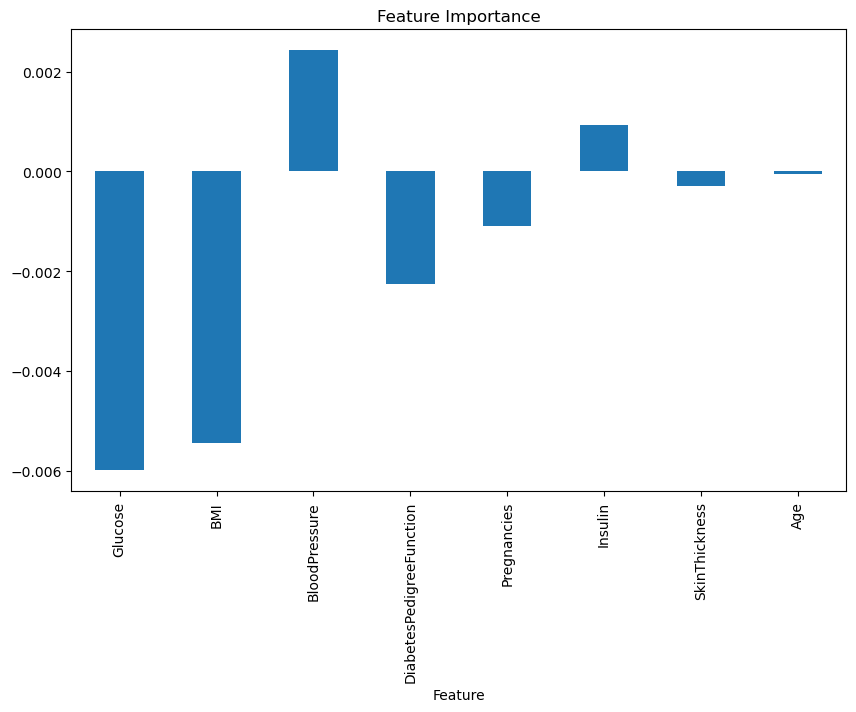

In [55]:
#define feature names
feature_names = df.columns[:-1]
#Get the coefficients from the best model
feature_importance = best_perceptron.coef_.flatten()

#Create a dataframe to store features and coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': feature_importance
})

#Get the absolute value of the coefficient
importance_df['Absolute Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

#Display the ranked order of the features based on importance
print("Top features based on importance:")
print(importance_df[['Feature', 'Coefficient']])
importance_df.set_index('Feature')['Coefficient'].plot(kind='bar', figsize=(10, 6), title="Feature Importance")
plt.show()